<a href="https://colab.research.google.com/github/Kidchris/Lesson/blob/master/facialRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from sklearn.model_selection import train_test_split
from google.colab import files, drive


In [ ]:
drive.mount("./contents")
# def interp(img, size):
#     if img.shape[0] > size[0] or img.shape[1] > size[1]:
#         return cv.INTER_CUBIC
#     else:
#         return cv.INTER_AREA

Drive already mounted at ./contents; to attempt to forcibly remount, call drive.mount("./contents", force_remount=True).


In [ ]:
# def reader(img, size = (400, 400)):
#     im = cv.imread(img)
#     img = cv.resize(im, size, interpolation=interp(im, size))
#     return img

In [ ]:
# path = '/home/chris/Desktop/fichiers_ipy/openCv/persons'

# values, labels = [], []

# labels = [
# "TonyStark",
# "chrisKid",
# "elonMusk"
#         ]
# img_data = []

# for label  in labels:
#     for files in os.listdir(os.path.join(path, label)):
#         img = os.path.join(os.path.join(path, label), files)
#         image = reader(img, (300, 300))
#         img_data.append([image, labels.index(label)])


In [ ]:
path= "/content/contents/MyDrive/data_recognizer.npy"
data = np.load(path, allow_pickle=True)

In [ ]:
X, Y = [], []

for x, y in data:
    X.append(x)
    Y.append(y)

# import pickle
# fichier = "/home/chris/Desktop/fichiers_ipy/openCv/data_recognizer.npy"

# np.save(fichier, data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=420)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [ ]:
y_test.shape

(87,)

In [ ]:
# path_2 = '/home/chris/Desktop/fichiers_ipy/openCv/augmented'
# if os.path.exists(path_2):
#     pass
# else:
#     os.makedirs(path_2)

In [ ]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.,
                                                          #  brightness_range=[10, 30],
                                                       rotation_range=30,
                                                       width_shift_range=.2,
                                                       height_shift_range=.2,
                                                       horizontal_flip=True,
                                                      #  vertical_flip=True,
                                                       zoom_range=.2)

train = data_gen.flow(x=X_train, y=y_train,
                      seed=40,
                      batch_size=100,
                      # save_to_dir=path_2,
                      # save_prefix='img_',
                      )

test = data_gen.flow(x=X_test, y=y_test,
                      seed=40,
                     batch_size=100,
                     )

In [ ]:
disp = next(train)
len((disp[-1]))

100

In [ ]:
disp_values= np.reshape(disp[0], (-1, 300, 300, 3))
disp_labels = disp[-1]

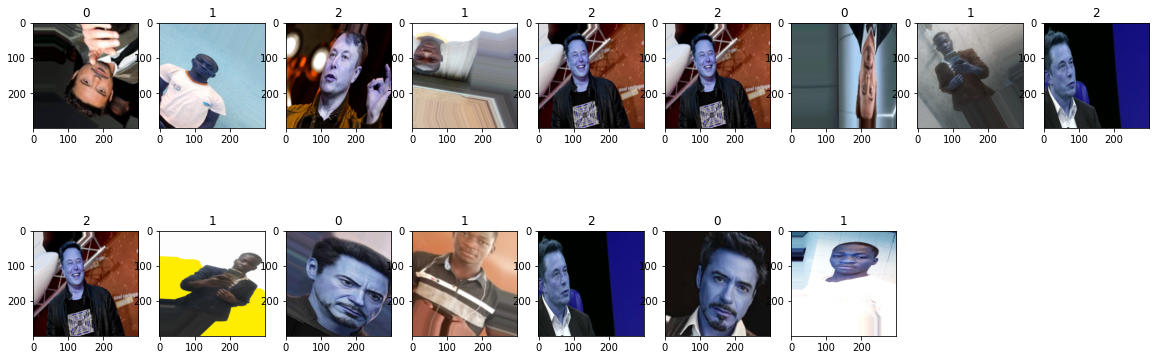

In [ ]:
import random as rd
length = len(disp_values)
plt.figure(figsize=(20, 7))
for i in range(1, 17):
    plt.subplot(2, 9, i)
    choice = rd.choice(range(length-1))
    plt.imshow(disp_values[choice])
    plt.title(f"{disp_labels[choice]}")


In [ ]:
inp = tf.keras.layers.Input((300, 300, 3))
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(inp)
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64,3, activation='relu', kernel_regularizer="l2")(x)
x = tf.keras.layers.Conv2D(64,3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(128,3, activation='relu')(x)
x = tf.keras.layers.Conv2D(128,3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(256,3, activation='relu', kernel_regularizer="l2")(x)
x = tf.keras.layers.Conv2D(256,3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(.3)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(.3)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

x = tf.keras.layers.Dense(3, "softmax")(x)
model = tf.keras.models.Model(inputs = inp, outputs = x)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 296, 296, 16)      2320      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 146, 146, 32)      4640      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 73, 32)        0   

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", metrics="acc", optimizer="adam")

In [ ]:
res = model.fit(train, epochs=150, validation_data=test, steps_per_epoch=100)

Epoch 1/150
100/100 [==============================] - 6s 43ms/step - loss: 1.3547 - acc: 0.3514 - val_loss: 1.3210 - val_acc: 0.3333


In [ ]:
plt.figure(facecolor="#754")
plt.plot(res.history['acc'], label="accuracy")
plt.plot(res.history['val_acc'], label="val_acc")
plt.legend()
plt.figure(facecolor="#457")
plt.plot(res.history['loss'], label="loss", c="k")
plt.plot(res.history['val_loss'], label="val loss", c="r")
plt.legend()